In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(train_data.shape)
print(len(train_labels))
print(train_labels)
print(test_data.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


In [4]:
train_data = train_data / 255.0

test_data = test_data / 255.0

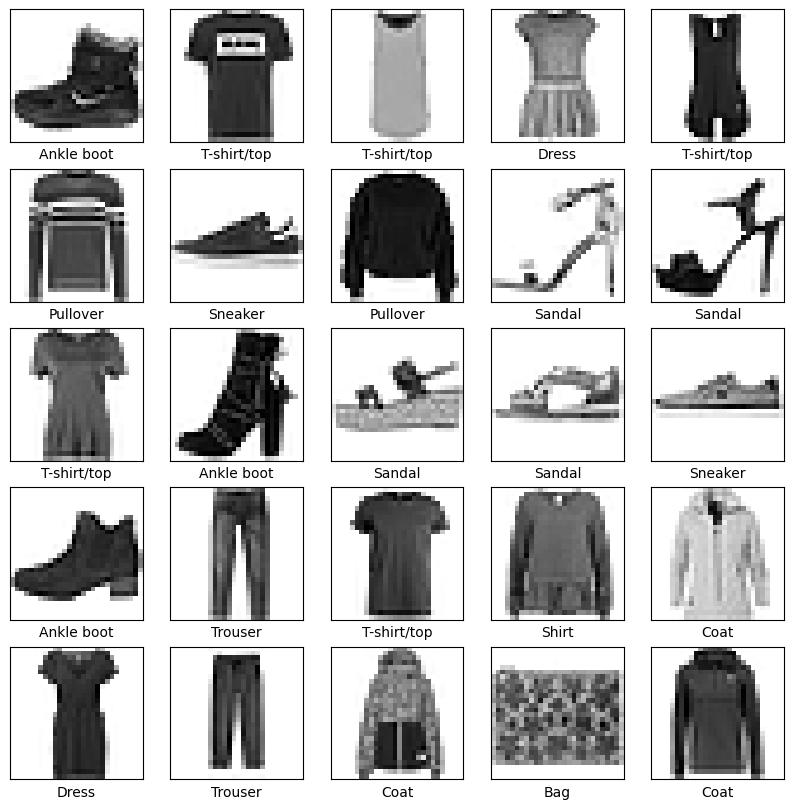

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1000, activation='relu', input_dim=784),
    Dense(300, activation='relu'),
    Dense(20, activation='softmax')
  ])


In [19]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
model.fit(train_data, train_labels, batch_size=1024, epochs=10)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6655 - loss: 1.0339
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8475 - loss: 0.4258
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8671 - loss: 0.3704
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8786 - loss: 0.3386
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8882 - loss: 0.3092
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8939 - loss: 0.2919
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9002 - loss: 0.2781
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9025 - loss: 0.2675
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9120 - loss: 0.2424
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9127 - loss: 0.2362


In [21]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
train_loss, train_acc = model.evaluate(train_data, train_labels)

print('\nTest accuracy for test:', test_acc)
print('\nTest accuracy for train:', train_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8884 - loss: 0.3142
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9214 - loss: 0.2177

Test accuracy for test: 0.887499988079071

Test accuracy for train: 0.9205833077430725


-------------------------------------------------------------------

In [58]:
first_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(2000, activation='relu', input_dim=784),
    Dropout(0,2),
    Dense(500, activation='relu'),
    Dense(20, activation='softmax')
])

second_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0,2),
    Dense(256, activation='relu'),
    Dropout(0,2),
    Dense(20, activation='softmax')
])

third_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1000, activation='relu')
])

In [59]:
first_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

second_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

third_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [60]:
print("first_model")
print("-----")
first_model.fit(train_data, train_labels, batch_size=1024, epochs=10)
print("-----")
print("second_model")
print("-----")
second_model.fit(train_data, train_labels, batch_size=1024, epochs=10)
print("-----")
print("third_model")
print("-----")
third_model.fit(train_data, train_labels, batch_size=1024, epochs=10)

first_model
-----
Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6561 - loss: 1.0577
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8506 - loss: 0.4163
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8722 - loss: 0.3565
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8805 - loss: 0.3239
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8895 - loss: 0.3022
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8982 - loss: 0.2798
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9015 - loss: 0.2615
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9082 - loss: 0.2471
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9111 - loss: 0.2393
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9173 - loss: 0.2215
-----
second_model
-----
Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6449 - loss: 1.1182
Epoch 2/10
59/59 ━━━━━━━━━━━━━

In [61]:
test_loss_first, test_acc_first = first_model.evaluate(test_data, test_labels, verbose=2)

test_loss_second, test_acc_second = second_model.evaluate(test_data, test_labels, verbose=2)

test_loss_third, test_acc_third = third_model.evaluate(test_data, test_labels, verbose=2)

print('\nTest accuracy for first test:', test_acc_first)
print('\nTest accuracy for second test:', test_acc_second)
print('\nTest accuracy for third test:', test_acc_third)


313/313 - 1s - 3ms/step - accuracy: 0.8807 - loss: 0.3291
313/313 - 1s - 3ms/step - accuracy: 0.8792 - loss: 0.3324
313/313 - 2s - 6ms/step - accuracy: 0.5665 - loss: 1.4344

Test accuracy for first test: 0.8806999921798706

Test accuracy for second test: 0.8791999816894531

Test accuracy for third test: 0.5665000081062317


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


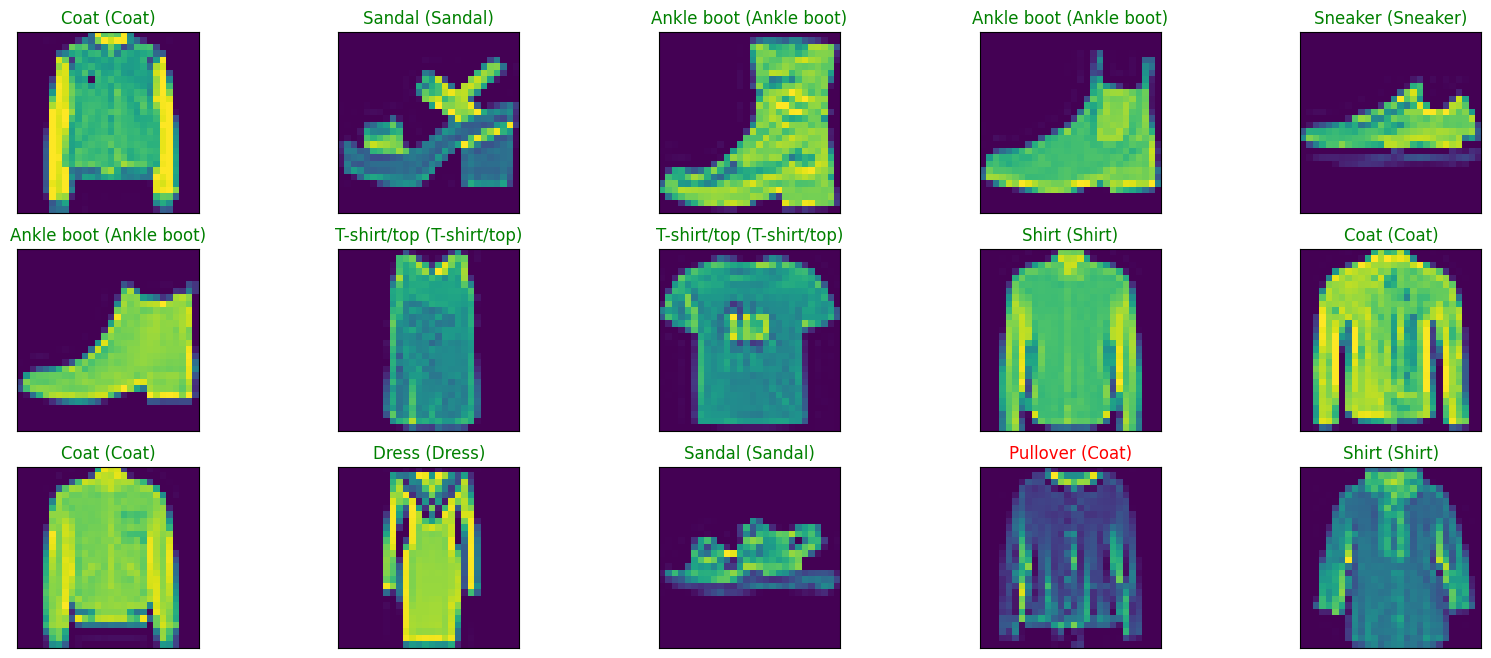

In [74]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_hat = model.predict(test_data)
X_test = test_data.reshape(10000, 28, 28)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_data.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_data[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index]
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))